In [1]:
# Import pandas library
import pandas as pd

# Data Preprocessing

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv(r'C:\Users\User\smoking_driking_dataset_Ver01.csv')

In [3]:
# Check for missing values in the dataset
df.isnull().any()

sex                 False
age                 False
height              False
weight              False
waistline           False
sight_left          False
sight_right         False
hear_left           False
hear_right          False
SBP                 False
DBP                 False
BLDS                False
tot_chole           False
HDL_chole           False
LDL_chole           False
triglyceride        False
hemoglobin          False
urine_protein       False
serum_creatinine    False
SGOT_AST            False
SGOT_ALT            False
gamma_GTP           False
SMK_stat_type_cd    False
DRK_YN              False
dtype: bool

In [4]:
# Remove rows with missing values in the 'SMK_stat_type_cd' column
df.dropna(subset=['SMK_stat_type_cd'], inplace=True)

In [5]:
# Remove rows with missing values in the 'DRK_YN' column
df.dropna(subset=['DRK_YN'], inplace=True)

In [6]:
# Remove duplicate rows in the dataset
df = df.drop_duplicates()

In [7]:
# Map categorical values to numerical values in 'sex', 'DRK_YN', and 'SMK_stat_type_cd' columns

df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["DRK_YN"] = df["DRK_YN"].map({"Y": 1, "N": 0})

smk_stat_mapping = {1: 0, 2: 1, 3: 2}
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].map(smk_stat_mapping)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder_2 = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])

df['DRK_YN'] = label_encoder_2.fit_transform(df['DRK_YN'])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,991320.0,0.531008,0.499038,0.0,0.0,1.0,1.0,1.0
age,991320.0,47.614529,14.181346,20.0,35.0,45.0,60.0,85.0
height,991320.0,162.240563,9.282922,130.0,155.0,160.0,170.0,190.0
weight,991320.0,63.283884,12.514101,25.0,55.0,60.0,70.0,140.0
waistline,991320.0,81.233255,11.850296,8.0,74.1,81.0,87.8,999.0
sight_left,991320.0,0.980833,0.605954,0.1,0.7,1.0,1.2,9.9
sight_right,991320.0,0.978428,0.604779,0.1,0.7,1.0,1.2,9.9
hear_left,991320.0,1.031495,0.174652,1.0,1.0,1.0,1.0,2.0
hear_right,991320.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991320.0,122.432360,14.543083,67.0,112.0,120.0,131.0,273.0


In [9]:
# Identify columns with potential outliers
possible_na = ["waistline", "sight_left", "sight_right", "SGOT_AST", "SGOT_ALT","gamma_GTP"]

In [10]:
# Remove rows with extreme values in specified columns
for column in possible_na:
    df = df[df[column] != df[column].max()]

In [11]:
# Display updated summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,985282.0,0.530715,0.499056,0.0,0.0,1.0,1.0,1.0
age,985282.0,47.534609,14.146148,20.0,35.0,45.0,60.0,85.0
height,985282.0,162.259673,9.278974,130.0,155.0,160.0,170.0,190.0
weight,985282.0,63.298396,12.518552,25.0,55.0,60.0,70.0,140.0
waistline,985282.0,81.166581,9.593149,8.0,74.0,81.0,87.6,149.1
sight_left,985282.0,0.953213,0.341180,0.1,0.7,1.0,1.2,2.5
sight_right,985282.0,0.950827,0.339704,0.1,0.7,1.0,1.2,2.5
hear_left,985282.0,1.031064,0.173491,1.0,1.0,1.0,1.0,2.0
hear_right,985282.0,1.030069,0.170776,1.0,1.0,1.0,1.0,2.0
SBP,985282.0,122.400475,14.527969,70.0,112.0,120.0,131.0,273.0


In [12]:
# List of numerical columns for outlier detection and handling
num_cols = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

In [13]:
# Function to calculate outlier thresholds for a column
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.90):
    """
    Calculate lower and upper thresholds for detecting outliers in a column of a DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column for which outliers will be detected.
        q1 (float): The lower quantile value to determine the lower threshold.
        q3 (float): The upper quantile value to determine the upper threshold.

    Returns:
        float: The lower threshold value.
        float: The upper threshold value.
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Function to check for outliers in a column
def check_outlier(df, col_name):
    """
    Check for outliers in a column of a DataFrame based on specified thresholds.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column to check for outliers.

    Returns:
        bool: True if outliers are found, False if not.
    """
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

# List to store columns with outliers
outlier_cols = []

# Check for outliers in numerical columns
for col in num_cols:
    if check_outlier(df, col):
        outlier_cols.append(col)
        print(col)

weight
waistline
SBP
DBP
BLDS
tot_chole
HDL_chole
LDL_chole
triglyceride
hemoglobin
serum_creatinine
SGOT_AST
SGOT_ALT
gamma_GTP


In [14]:
# Function to apply Winsorization to a column
def winsorize(dataframe, col_name, lower_quantile=0.05, upper_quantile=0.95):
    """
    Apply Winsorization to a specific column in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        col_name (str): The name of the column to winsorize.
        lower_quantile (float): The lower quantile value for determining the lower limit.
        upper_quantile (float): The upper quantile value for determining the upper limit.

    Returns:
        None
    """
    lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, q1=lower_quantile, q3=upper_quantile)
    dataframe[col_name] = dataframe[col_name].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))


# Defining lower and upper quantiles for Winsorization
lower_quantile = 0.05
upper_quantile = 0.90

# Apply Winsorization to columns with outliers
for col in outlier_cols:
    winsorize(df, col, lower_quantile, upper_quantile)

In [15]:
# Display updated summary statistics after Winsorization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,985282.0,0.530715,0.499056,0.00,0.0,1.0,1.0,1.00
age,985282.0,47.534609,14.146148,20.00,35.0,45.0,60.0,85.00
height,985282.0,162.259673,9.278974,130.00,155.0,160.0,170.0,190.00
weight,985282.0,63.298360,12.518347,25.00,55.0,60.0,70.0,132.50
waistline,985282.0,81.166548,9.592732,25.50,74.0,81.0,87.6,133.50
sight_left,985282.0,0.953213,0.341180,0.10,0.7,1.0,1.2,2.50
sight_right,985282.0,0.950827,0.339704,0.10,0.7,1.0,1.2,2.50
hear_left,985282.0,1.031064,0.173491,1.00,1.0,1.0,1.0,2.00
hear_right,985282.0,1.030069,0.170776,1.00,1.0,1.0,1.0,2.00
SBP,985282.0,122.397893,14.511990,70.00,112.0,120.0,131.0,200.00


In [16]:
# Scale numerical features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

#columns_to_scale = df.columns.difference(["DRK_YN", "SMK_stat_type_cd"])
columns_to_scale = df.columns.difference(["DRK_YN"])

df_input = df[columns_to_scale]

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_input)
scaled_data = pd.DataFrame(scaled_data, columns=columns_to_scale)


In [17]:
# Display shape and summary statistics of scaled data
scaled_data.shape

(985282, 23)

In [18]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BLDS,985282.0,0.476497,0.121932,0.0,0.402556,0.453674,0.511182,1.0
DBP,985282.0,0.443763,0.101821,0.0,0.381443,0.443299,0.505155,1.0
HDL_chole,985282.0,0.406747,0.108203,0.0,0.327273,0.392727,0.472727,1.0
LDL_chole,985282.0,0.368469,0.113507,0.0,0.289474,0.361842,0.440789,1.0
SBP,985282.0,0.403061,0.111631,0.0,0.323077,0.384615,0.469231,1.0
SGOT_ALT,985282.0,0.255471,0.174234,0.0,0.148936,0.202128,0.297872,1.0
SGOT_AST,985282.0,0.352047,0.149887,0.0,0.260870,0.318841,0.391304,1.0
SMK_stat_type_cd,985282.0,0.304087,0.409312,0.0,0.000000,0.000000,0.500000,1.0
age,985282.0,0.423609,0.217633,0.0,0.230769,0.384615,0.615385,1.0
gamma_GTP,985282.0,0.207282,0.195038,0.0,0.092879,0.136223,0.235294,1.0


In [19]:
# Define the target column for classification (e.g.,'SMK_stat_type_cd')
#df_out_smoke = df['SMK_stat_type_cd']

In [20]:
# Define the target column for classification (e.g., 'DRK_YN')
df_out_drink = df['DRK_YN']

In [21]:
# Reshape target column for one-hot encoding
#df_out_smoke_2 = df_out_smoke.values.reshape(-1, 1)
df_out_drink_2 = df_out_drink.values.reshape(-1, 1)

In [22]:
# One-hot encode the target column using scikit-learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#ohe_smoke = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(df_out_smoke_2.reshape(-1, 1))

ohe_drink = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(df_out_drink_2.reshape(-1, 1))

#df_out_smoke_2 = ohe_smoke.transform(df_out_smoke_2)

df_out_drink_2 = ohe_drink.transform(df_out_drink_2)

# Display shape of the one-hot encoded target columnµ*****************
df_out_drink_2.shape


C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(985282, 2)

# PyTorch Dataset and DataLoader Setup

In [23]:
# Define a custom dataset class for PyTorch
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, df_input, df_out):
        # convert into PyTorch tensors and remember them
        self.df_input = torch.Tensor(df_input)
        self.df_out = torch.Tensor(df_out)
 
    def __len__(self):
        # this should return the size of the dataset
        return len(self.df_out)
 
    def __getitem__(self, idx):
        # this should return one sample from the dataset
        input_data = self.df_input[idx]
        output_data = self.df_out[idx]
        return input_data, output_data

In [24]:
# set up DataLoader for data set
import torch

# Convert scaled input data and one-hot encoded target data to PyTorch tensors
df_input_2 = torch.tensor(scaled_data.values, dtype=torch.float32)

#df_out_smoke_2 = torch.tensor(df_out_smoke_2, dtype=torch.float32)
df_out_drink_2 = torch.tensor(df_out_drink_2, dtype=torch.float32)

# Create instances of the custom dataset class for training, validation, and testing
#dataset = CustomDataset(df_input_2, df_out_smoke_2)
dataset = CustomDataset(df_input_2, df_out_drink_2)

In [25]:
# Split the dataset into training, validation, and testing sets
from sklearn.model_selection import train_test_split

val_test_data, train_data = train_test_split(dataset, test_size = 0.6, random_state=1)

val_data, test_data = train_test_split(val_test_data, test_size = 0.5, random_state=1)

In [26]:
# Create DataLoader instances for the datasets
from torch.utils.data import DataLoader

batch_size = 50

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=False, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

# Neural Network Model Definition

In [27]:
# Define the neural network architecture using PyTorch
import torch.nn as nn
class DrinkerSmokerClass(nn.Module):
    def __init__(self):
        super().__init__()
        

        self.fc1 = nn.Linear(23, 64)
        self.batchnorm_fc1 = nn.BatchNorm1d(64)
        
        self.fc2 = nn.Linear(64, 23)
        self.batchnorm_fc2 = nn.BatchNorm1d(23)
        
        self.fc3 = nn.Linear(23, 2)
        self.batchnorm_fc3 = nn.BatchNorm1d(2)

        #self.fc4 = nn.Linear(32, 23)
        #self.batchnorm_fc4 = nn.BatchNorm1d(23)
        
        #self.fc5 = nn.Linear(23, 2)
        #self.batchnorm_fc5 = nn.BatchNorm1d(2)
        
        self.dropout = nn.Dropout(0.1)

        #self.af = nn.ReLU()
        # self.af = nn.Sigmoid()
        self.af_2 = nn.Tanh()
        self.af = nn.LeakyReLU()
        #self.af = nn.PReLU()
        #self.af = nn.SELU()
        
        
        # self.af_out = nn.Softmax(dim=1)
        self.af_out = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        #x = self.batchnorm_fc1(x)
        x = self.af(x)
        
        x = self.fc2(x)
        #x = self.batchnorm_fc2(x)
        x = self.dropout(x)
        x = self.af_2(x)
        
        x = self.fc3(x)
        #x = self.batchnorm_fc3(x)
        
        x = self.af_out(x)
        return x


import torch.nn as nn
class DrinkerSmokerClass(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=1, stride=1)
        self.batchnorm_conv1 = nn.BatchNorm1d(16)
        
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=1, stride=1)
        self.batchnorm_conv2 = nn.BatchNorm1d(32)
        
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=2, stride=3)
        self.batchnorm_conv3 = nn.BatchNorm1d(64)
        
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(512, 16)
        self.batchnorm_fc1 = nn.BatchNorm1d(16)
        
        self.fc2 = nn.Linear(16, 2)
        self.batchnorm_fc2 = nn.BatchNorm1d(2)
        
        self.fc3 = nn.Linear(16, 3)
        self.batchnorm_fc3 = nn.BatchNorm1d(3)

        self.af = nn.PReLU()
        
        #self.af_out = nn.Softmax(dim=1)
        self.af_out = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm_conv1(x)
        x = self.af(x)
        x = self.conv2(x)
        x = self.batchnorm_conv2(x)
        x = self.af(x)
        x = self.conv3(x)
        x = self.batchnorm_conv3(x)
        x = self.af(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.batchnorm_fc1(x)
        x = self.af(x)
        x = self.fc2(x)
        x = self.batchnorm_fc2(x)
        x = self.af_out(x)
        return x


# Set up early stopping with model saving
class EarlyStoppingWithCheckpoint:
    def __init__(self, patience=5, delta=0, verbose=False, checkpoint_path='best_model.pth'):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.checkpoint_path = checkpoint_path

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
                
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'Epoch {epoch + 1}, Validation loss did not decrease ({val_loss:.6f}), Counter: {self.counter}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            self.save_checkpoint(val_loss, model)

        return self.early_stop

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({val_loss:.6f} --> saving model)')
        torch.save(model.state_dict(), self.checkpoint_path)

In [28]:
# Set up early stopping with model saving
class EarlyStoppingWithCheckpoint:
    def __init__(self, patience=5, delta=0, verbose=False, checkpoint_path='best_model.pth'):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.checkpoint_path = checkpoint_path

    def __call__(self, val_accuracy, model):
        score = val_accuracy

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_accuracy, model)
                
        elif score < self.best_score - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'Epoch {epoch + 1}, Validation accuracy did not increase ({val_accuracy:.4f}), Counter: {self.counter}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            self.save_checkpoint(val_accuracy, model)

        return self.early_stop

    def save_checkpoint(self, val_accuracy, model):
        if self.verbose:
            print(f'Validation accuracy increased ({val_accuracy:.4f} --> saving model)')
        torch.save(model.state_dict(), self.checkpoint_path)

In [29]:
# Hyperparameters

import torch.optim as optim

n_epochs = 20

model = DrinkerSmokerClass()

loss_fn = nn.BCELoss()
#loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0002)
#optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.002)

# Set up early stopping
early_stopping = EarlyStoppingWithCheckpoint(patience=3, verbose=True)

In [30]:
import numpy as np

# import EarlyStopping
# from pytorchtools import EarlyStopping

best_acc = - np.inf   # init to negative infinity
best_weights = None
patience = 3

train_loss_hist = []
train_acc_hist = []

val_loss_hist = []
val_acc_hist = []

l1_lambda = 0.001

# initialize the early_stopping object
# early_stopping = EarlyStopping(patience=patience, verbose=True)

# Training and Evaluation Loop

In [31]:
# training loop
from tqdm import tqdm
import copy

# Training loop
for epoch in range(n_epochs):
    # set model in training mode and run through each batch
    model.train()
    running_train_loss = 0
    running_train_acc = 0
    progress_bar_train = tqdm(enumerate(train_loader))
    for index, (X_batch_train, y_batch_train) in progress_bar_train:
        optimizer.zero_grad()
        # forward pass
        #y_pred_train = model(X_batch_train.unsqueeze(1))
        y_pred_train = model(X_batch_train)
        current_lr = optimizer.param_groups[0]['lr']
        #print(f"Current learning rate: {current_lr}")

        
        """
        
        l1_reg = 0
        for param in model.parameters():
            l1_reg += torch.abs(param).sum()
            loss_train = loss_fn(y_pred_train, y_batch_train) + l1_lambda*l1_reg
        """
            
        loss_train = loss_fn(y_pred_train, y_batch_train)
        running_train_loss += loss_train.item()
        # backward pass
        optimizer.zero_grad()
        loss_train.backward()
        # update weights
        optimizer.step()
        
        # compute accuracy metrics
        correct_pred_train = (torch.argmax(y_pred_train, 1) == torch.argmax(y_batch_train, 1)).float()
        acc_train = correct_pred_train.sum() / len(correct_pred_train)
        running_train_acc += acc_train
         
        
        progress_bar_train.set_description(f'Epoch [{epoch+1}/{n_epochs}] Training Loss: {running_train_loss/(index+1):.4f} Training accuracy: {(running_train_acc/(index+1))*100:.2f}%' f"Current learning rate: {current_lr}")
    
     # store metrics
    train_loss_hist.append(running_train_loss/(index+1))
    train_acc_hist.append(running_train_acc/(index+1))
    
    # Validation
    model.eval()
    running_val_loss = 0
    running_val_acc = 0
    progress_bar_val = tqdm(enumerate(val_loader)) 
    for index, (X_batch_val, y_batch_val) in progress_bar_val:
        with torch.no_grad():
            #y_pred_val = model(X_batch_val.unsqueeze(1))
            y_pred_val = model(X_batch_val)
            val_test = loss_fn(y_pred_val, y_batch_val)
            running_val_loss += val_test.item()
            
            # Calculate accuracy metric
            correct_pred_val = (torch.argmax(y_pred_val, 1) == torch.argmax(y_batch_val, 1)).float()
            acc_val = correct_pred_val.sum() / len(correct_pred_val)
            running_val_acc += acc_val
            
            progress_bar_val.set_description(f'Epoch [{epoch+1}/{n_epochs}] Validation Loss: {running_val_loss/(index+1):.4f} Validation accuracy: {(running_val_acc/(index+1))*100:.2f}%')
        
    val_loss_hist.append(running_val_loss/(index+1))
    val_acc_hist.append(running_val_acc/(index+1))
    
    # Early stopping check
    if early_stopping(running_val_acc/(index+1), model):
        print(f'Early stopping after {early_stopping.counter} epochs without improvement in accuracy.')
        break
 
     

Epoch [1/20] Training Loss: 0.5299 Training accuracy: 72.97%Current learning rate: 0.001: : 11824it [02:58, 66.15it/s] 
Epoch [1/20] Validation Loss: 0.5221 Validation accuracy: 73.44%: : 3942it [00:25, 154.67it/s]


Validation accuracy increased (0.7344 --> saving model)


Epoch [2/20] Training Loss: 0.5235 Training accuracy: 73.38%Current learning rate: 0.001: : 11824it [02:02, 96.30it/s] 
Epoch [2/20] Validation Loss: 0.5216 Validation accuracy: 73.48%: : 3942it [00:21, 179.38it/s]


Validation accuracy increased (0.7348 --> saving model)


Epoch [3/20] Training Loss: 0.5225 Training accuracy: 73.48%Current learning rate: 0.001: : 11824it [02:09, 91.60it/s] 
Epoch [3/20] Validation Loss: 0.5204 Validation accuracy: 73.60%: : 3942it [00:21, 183.68it/s]


Validation accuracy increased (0.7360 --> saving model)


Epoch [4/20] Training Loss: 0.5220 Training accuracy: 73.45%Current learning rate: 0.001: : 11824it [02:00, 98.32it/s] 
Epoch [4/20] Validation Loss: 0.5191 Validation accuracy: 73.71%: : 3942it [00:19, 198.49it/s]


Validation accuracy increased (0.7371 --> saving model)


Epoch [5/20] Training Loss: 0.5218 Training accuracy: 73.48%Current learning rate: 0.001: : 11824it [01:53, 103.82it/s]
Epoch [5/20] Validation Loss: 0.5200 Validation accuracy: 73.62%: : 3942it [00:16, 244.53it/s]


Epoch 5, Validation accuracy did not increase (0.7362), Counter: 1


Epoch [6/20] Training Loss: 0.5213 Training accuracy: 73.54%Current learning rate: 0.001: : 11824it [01:45, 112.17it/s]
Epoch [6/20] Validation Loss: 0.5194 Validation accuracy: 73.61%: : 3942it [00:15, 256.37it/s]


Epoch 6, Validation accuracy did not increase (0.7361), Counter: 2


Epoch [7/20] Training Loss: 0.5213 Training accuracy: 73.54%Current learning rate: 0.001: : 11824it [01:50, 107.04it/s]
Epoch [7/20] Validation Loss: 0.5231 Validation accuracy: 73.23%: : 3942it [00:19, 203.15it/s]


Epoch 7, Validation accuracy did not increase (0.7323), Counter: 3
Early stopping after 3 epochs without improvement in accuracy.


In [32]:
# Load the best model
best_model = DrinkerSmokerClass()
best_model.load_state_dict(torch.load('best_model.pth'))

<All keys matched successfully>

In [33]:
# Testing
test_loss_hist = []
test_acc_hist = []

In [34]:
# Evaluate the best model on the test set
model.eval()
running_test_loss = 0
running_test_acc = 0
progress_bar_test = tqdm(enumerate(test_loader)) 
for index, (X_batch_test, y_batch_test) in progress_bar_test:
    with torch.no_grad():
        y_pred_test = best_model(X_batch_test)
        loss_test = loss_fn(y_pred_test, y_batch_test)
        running_test_loss += loss_test.item()
            
        # Calculate accuracy metric
        correct_pred_test = (torch.argmax(y_pred_test, 1) == torch.argmax(y_batch_test, 1)).float()
        acc_test = correct_pred_test.sum() / len(correct_pred_test)
        running_test_acc += acc_test
        
        if index < 1:
            total_pred = y_pred_test
            total_y_batch_test = y_batch_test
        else:
            total_pred = torch.cat([total_pred, y_pred_test], dim=0, out=None)
            total_y_batch_test = torch.cat([total_y_batch_test, y_batch_test], dim=0, out=None)
            
        progress_bar_test.set_description(f'Test Loss: {running_test_loss/(index+1):.4f} Test accuracy: {(running_test_acc/(index+1))*100:.2f}%' f" Current learning rate: {current_lr}")
        
test_loss_hist.append(running_test_loss/(index+1))
test_acc_hist.append(running_test_acc/(index+1))

Test Loss: 0.5183 Test accuracy: 73.75% Current learning rate: 0.001: : 3942it [00:22, 174.60it/s]


In [35]:
total_y_batch_test.shape

torch.Size([197056, 2])

In [36]:
max_values_test, max_indices_test = torch.max(total_y_batch_test, dim=1)

In [37]:
max_indices_test.shape

torch.Size([197056])

In [38]:
max_values_pred, max_indices_pred = torch.max(total_pred, dim=1)

In [39]:
max_indices_pred

tensor([0, 1, 1,  ..., 0, 0, 0])

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(max_indices_pred, max_indices_test))

from sklearn.metrics import classification_report
print(classification_report(max_indices_pred,max_indices_test,digits=3))

[[72896 26089]
 [25633 72438]]
              precision    recall  f1-score   support

           0      0.740     0.736     0.738     98985
           1      0.735     0.739     0.737     98071

    accuracy                          0.738    197056
   macro avg      0.738     0.738     0.738    197056
weighted avg      0.738     0.738     0.738    197056



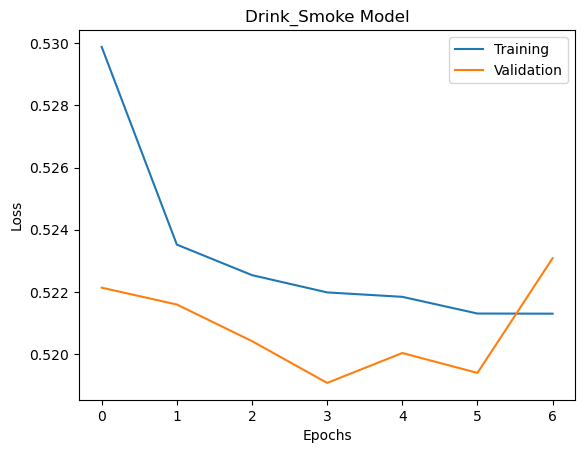

In [41]:
import matplotlib.pyplot as plt
plt.plot(train_loss_hist)
plt.plot(val_loss_hist)

plt.title('Drink_Smoke Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

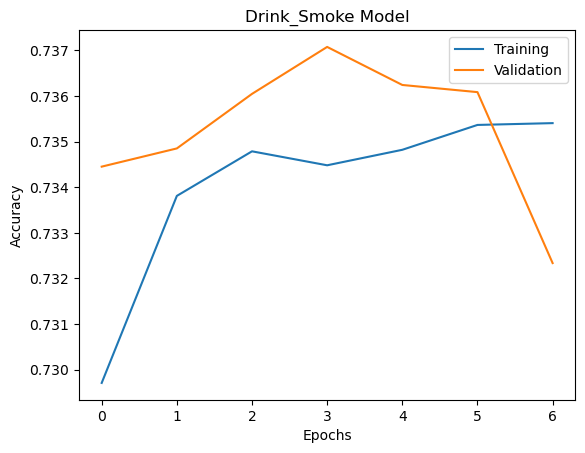

In [42]:
import matplotlib.pyplot as plt
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)

plt.title('Drink_Smoke Model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()